# Zomato Dataset EDA

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("dataset/zomato.csv", encoding="latin 1")

In [5]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.loc[:,["Average Cost for two","Price range","Aggregate rating","Votes"]].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# df[pd.isna(df["Cuisines"])]

In [10]:
country = pd.read_excel("dataset/Country-Code.xlsx")

In [11]:
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df = df.merge(country,on="Country Code",how="left")

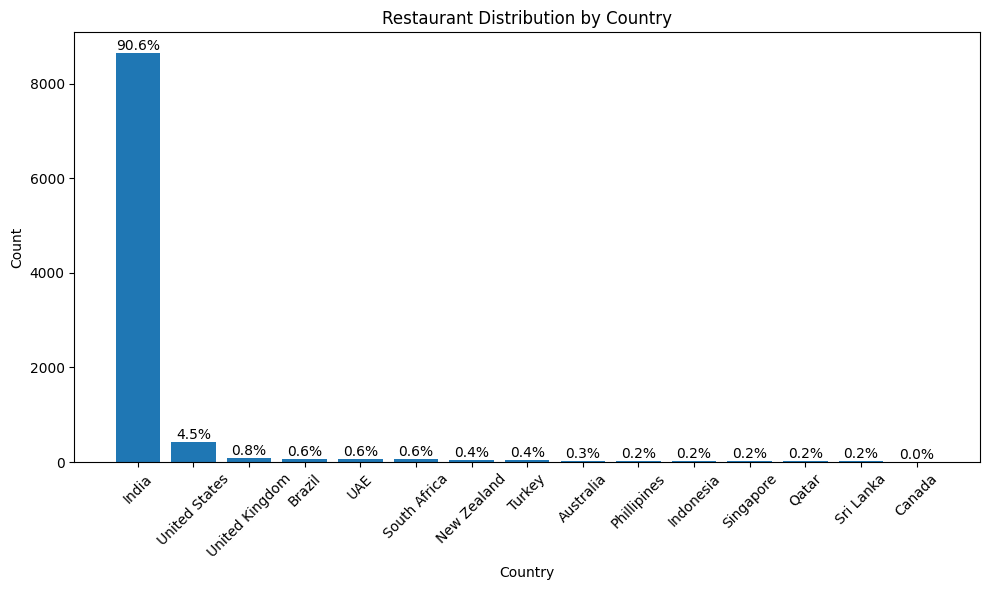

In [13]:
x = df.Country.value_counts().index
y = df.Country.value_counts().values

plt.figure(figsize=(10, 6))
bars = plt.bar(x, y)

# Calculate percentages
total = sum(y)
percentages = [(value / total) * 100 for value in y]

# Add percentage labels on top of each bar
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{pct:.1f}%',                      
        ha='center', va='bottom', fontsize=10
    )

plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Restaurant Distribution by Country")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [15]:
rating = df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index(name="Counts")

In [16]:
rating

,Aggregate rating,Rating color,Rating text,Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Overservition 
 1. 1.8 - 2.4 --> Poor
 2. 2.5 - 3.4 --> Average
 3. 3.5 - 4.0 --> Good
 4. 4.1 - 4.4 --> Very Good
 5. 4.5 - 4.9 --> Excellent

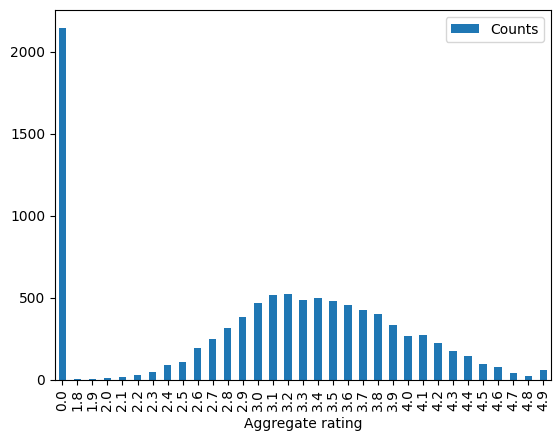

In [18]:
rating.plot(kind='bar', x="Aggregate rating", y="Counts")
# plt.figure(figsize=(12,5))
plt.show()

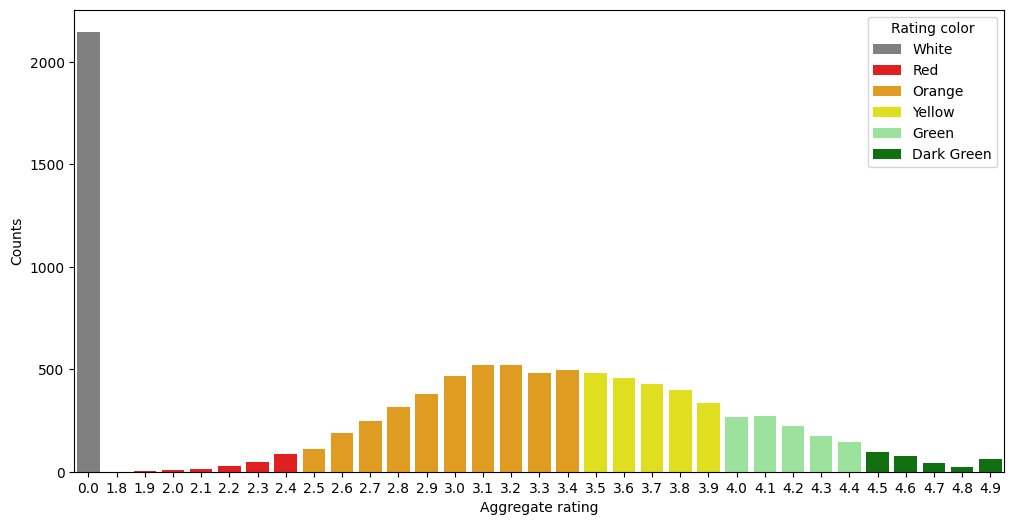

In [48]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating",y="Counts", data=rating,hue="Rating color",palette=['gray','red','orange','yellow','#90EE90',"green"] )
plt.show()

# Observation:
1. Not comment on rating is high
2. maximum people rate good only which is 2.5 - 3.4

In [65]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [79]:
df[df["Aggregate rating"]==0].groupby("Country")["Aggregate rating"].count().sort_values(ascending=False)

Country
India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Aggregate rating, dtype: int64

In [87]:
df.groupby(["Country","Currency"])["Currency"].count().reset_index(name="count").sort_values(by="count",ascending=False)

,Country,Currency,count
3,India,Indian Rupees(Rs.),8652
14,United States,Dollar($),434
13,United Kingdom,Pounds(£),80
1,Brazil,Brazilian Real(R$),60
9,South Africa,Rand(R),60
12,UAE,Emirati Diram(AED),60
5,New Zealand,NewZealand($),40
11,Turkey,Turkish Lira(TL),34
0,Australia,Dollar($),24
6,Phillipines,Botswana Pula(P),22


In [93]:
df.groupby(["Country","Has Online delivery"])["Has Online delivery"].count().unstack()

Has Online delivery,No,Yes
Country,,
Australia,24.0,NaN
Brazil,60.0,NaN
Canada,4.0,NaN
India,6229.0,2423.0
Indonesia,21.0,NaN
New Zealand,40.0,NaN
Phillipines,22.0,NaN
Qatar,20.0,NaN
Singapore,20.0,NaN


## Observation 
1. In India also a large area dosnt have Online delivery
2. Zomato only have Online delivery in India and UAE

In [96]:
df.City.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

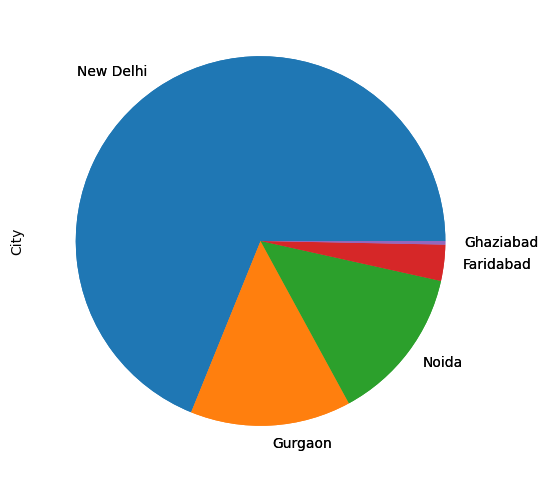

In [108]:
df.groupby("City")['City'].count().sort_values(ascending=False).head(5).plot(kind="pie")
plt.show()

In [118]:
df["Cuisines"].value_counts().head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64